In [ ]:
import pandas as pd
import nltk
import re
import math
import numpy as np
from gensim.models import Word2Vec
import gensim
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
from nltk.stem import WordNetLemmatizer
from keras.layers import LSTM, Dense, Bidirectional, Input,Dropout,BatchNormalization
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from keras.utils import to_categorical
from keras import backend as K

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import xgboost
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import pickle
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/Data/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/Data/test.csv")

In [ ]:
df_train = df_train.drop(["Unnamed: 0"],axis=1)
df_test = df_test.drop(["Unnamed: 0"],axis=1)

In [ ]:
df_train.head()

,text,label,cleaned_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,wall st bears claw back black reuters reuters ...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,carlyle looks toward commercial aerospace reut...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,oil economy cloud stocks outlook reuters reute...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,iraq halts oil exports main southern pipeline ...
4,"Oil prices soar to all-time record, posing new...",2,oil prices soar alltime record posing new mena...


In [ ]:
len(df_train)

120000

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [ ]:
df_train.head()

,text,label,cleaned_text
0,"Military toll tops 1,000 US military deaths in...",0,military toll tops 1000 us military deaths ira...
1,Finance stocks take trading lower Axa Asia Pac...,2,finance stocks take trading lower axa asia pac...
2,Romanians vote in presidential run-off BUCHARE...,0,romanians vote presidential runoff bucharest a...
3,Wall Street takes heart from Fed #39;s upbeat ...,2,wall street takes heart fed 39s upbeat economi...
4,"Needing a Win, Politics Makes Strange Fellas T...",1,needing win politics makes strange fellas wash...


In [ ]:
len(df_train)

120000

## Neural Networks

In [ ]:
X_train, X_test, y_train, y_test = df_train["cleaned_text"],df_test["cleaned_text"],df_train["label"],df_test["label"]

In [ ]:
tokenizer = Tokenizer()
# build the vocabulary based on train dataset
tokenizer.fit_on_texts(X_train)
# tokenize the train and test dataset
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# vocabulary size (num of unique words) -> will be used in embedding layer
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
max_length = max(len(seq) for seq in X_train)

# to test an outlier case (if one of the test dataset has longer length)
for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)

In [ ]:
X_train.shape

(120000, 100)

In [ ]:
# create hot_labels (idk whty tapi ini penting, kalo ga bakal error)
y_test = to_categorical(y_test, num_classes=4)
y_train = to_categorical(y_train, num_classes=4)

In [ ]:
import tensorflow.keras as keras
@keras.saving.register_keras_serializable(package="my_package", name="rec")
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

@keras.saving.register_keras_serializable(package="my_package", name="pre")
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

@keras.saving.register_keras_serializable(package="my_package", name="f1")
def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [ ]:
output_dim = 200

# LSTM model architechture (CNN + LSTM)
model = Sequential([
    # embedding layer is like idk
    Embedding(vocab_size, output_dim, input_length=max_length),
    # lstm for xxx
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    # dropout to prevent overfitting
    Dropout(0.5),
    # dense to connect the previous output with current layer
    Dense(128, activation="relu"),
    # dropout to prevent overfitting
    Dropout(0.5),
    # this is output layer, with 3 class (0, 1, 2)
    Dense(4, activation="softmax"),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1,precision, recall])


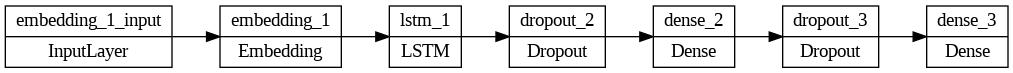

In [ ]:
tf.keras.utils.plot_model(model,rankdir="LR")

In [ ]:
model_history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs=4,
    validation_data=(X_test, y_test)
)

Epoch 1/4
1875/1875 [==============================] - 1419s 753ms/step - loss: 0.3586 - accuracy: 0.8804 - f1: 0.8678 - precision: 0.8871 - recall: 0.8530 - val_loss: 0.2626 - val_accuracy: 0.9171 - val_f1: 0.9166 - val_precision: 0.9228 - val_recall: 0.9105
Epoch 2/4
1875/1875 [==============================] - 1398s 745ms/step - loss: 0.1828 - accuracy: 0.9424 - f1: 0.9421 - precision: 0.9469 - recall: 0.9375 - val_loss: 0.2694 - val_accuracy: 0.9184 - val_f1: 0.9184 - val_precision: 0.9229 - val_recall: 0.9141
Epoch 3/4
1875/1875 [==============================] - 1379s 735ms/step - loss: 0.1211 - accuracy: 0.9594 - f1: 0.9593 - precision: 0.9619 - recall: 0.9569 - val_loss: 0.3228 - val_accuracy: 0.9149 - val_f1: 0.9147 - val_precision: 0.9170 - val_recall: 0.9124
Epoch 4/4
1875/1875 [==============================] - 1364s 727ms/step - loss: 0.0811 - accuracy: 0.9718 - f1: 0.9718 - precision: 0.9733 - recall: 0.9703 - val_loss: 0.3915 - val_accuracy: 0.9114 - val_f1: 0.9113 - val

In [ ]:
output_dim = 200

# LSTM model architechture (CNN + LSTM)
model = Sequential([
    # embedding layer is like idk
    Input(shape=(max_length,)),
    Embedding(vocab_size, output_dim, input_length=max_length),
    # lstm for xxx
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    # dropout to prevent overfitting
    Dropout(0.5),
    # dense to connect the previous output with current layer
    Dense(128, activation="relu"),
    # dropout to prevent overfitting
    Dropout(0.5),
    # this is output layer, with 3 class (0, 1, 2)
    Dense(4, activation="softmax"),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs=10,
    validation_data=(X_test, y_test)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 531s 563ms/step - accuracy: 0.7561 - loss: 0.6194 - val_accuracy: 0.9089 - val_loss: 0.2765
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 573s 574ms/step - accuracy: 0.9376 - loss: 0.2131 - val_accuracy: 0.9179 - val_loss: 0.2726
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 555s 567ms/step - accuracy: 0.9551 - loss: 0.1459 - val_accuracy: 0.9103 - val_loss: 0.3212
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 556s 562ms/step - accuracy: 0.9652 - loss: 0.1072 - val_accuracy: 0.9114 - val_loss: 0.3591
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 570s 570ms/step - accuracy: 0.9714 - loss: 0.0828 - val_accuracy: 0.9113 - val_loss: 0.3872
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 559s 567ms/step - accuracy: 0.9760 - loss: 0.0692 - val_accuracy: 0.9084 - val_loss: 0.4382
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 552s 557ms/step - accuracy: 0.9797 - loss: 0.0550 - val_accuracy: 0.9025 - val_loss: 0.4718
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 573s 569ms/step - accuracy: 0.9834 -

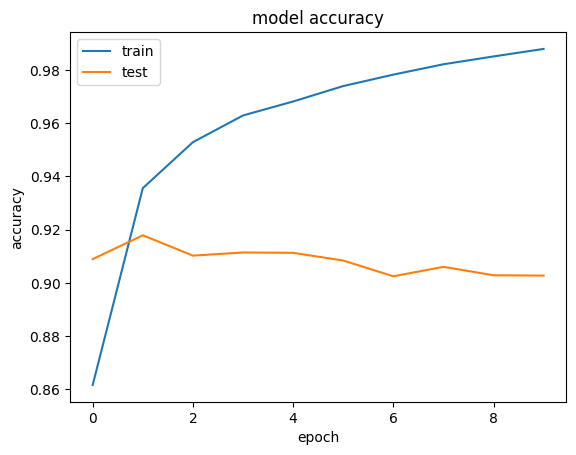

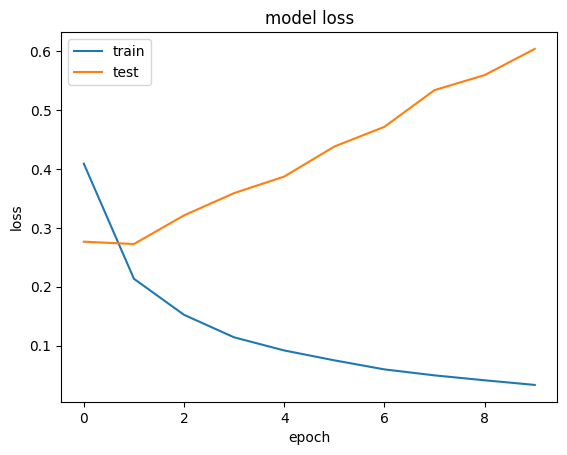

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
output_dim = 200


# LSTM model architechture (CNN + LSTM)
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(vocab_size, output_dim, input_length=max_length)),
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dropout(0.5))
# dense to connect the previous output with current layer
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs=4,
    validation_data=(X_test, y_test)
)

Epoch 1/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 542s 569ms/step - accuracy: 0.7599 - loss: 0.6287 - val_accuracy: 0.9146 - val_loss: 0.2734
Epoch 2/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 612s 624ms/step - accuracy: 0.9384 - loss: 0.2127 - val_accuracy: 0.9176 - val_loss: 0.2682
Epoch 3/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 570s 607ms/step - accuracy: 0.9561 - loss: 0.1452 - val_accuracy: 0.9149 - val_loss: 0.3053
Epoch 4/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 542s 578ms/step - accuracy: 0.9652 - loss: 0.1106 - val_accuracy: 0.9161 - val_loss: 0.3300


In [ ]:
model.save('/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/LSTM_final.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/LSTM2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Could not interpret initializer identifier: {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None}

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 200)          20390200  
                                                                 
 lstm_1 (LSTM)               (None, 64)                67840     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 20466876 (78.07 MB)
Trainable params: 20

In [ ]:
sent = ["sexton gets start unc least next two games florida state new face center head coach bobby bowden announced monday morning redshirt sophomore wyatt sexton would start place fifthyear"]
X_pred = tokenizer.texts_to_sequences(sent)
X_pred = pad_sequences(X_pred, maxlen = max_length)
X_pred

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
        15349,   411,   195, 14938,   120,    51,     8,   135,   368,
           65,     2,   329,   377,   264,   143,  2587,  7416,    66,
           10,   548, 17259,  7292, 15348, 15349,    37,   195,   462,
        25616]], dtype=int32)

In [ ]:
print(model.predict(X_pred)[0])
print(np.argmax(model.predict(X_pred)[0]))

1/1 [==============================] - 0s 306ms/step
[4.7846221e-05 9.9995124e-01 3.7583050e-07 6.3820789e-07]
1/1 [==============================] - 0s 29ms/step
1


In [ ]:
%pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [ ]:
import sys  # Import the sys module to access system-specific parameters and functions

# Print the Python version to the console
print("Python version")

# Use the sys.version attribute to get the Python version and print it
print(sys.version)

# Print information about the Python version
print("Version info.")

# Use the sys.version_info attribute to get detailed version information and print it
print(sys.version_info)

Python version
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Version info.
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [ ]:
model.save_weights('/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/LSTM_weights.h5')

In [ ]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(Embedding(vocab_size, output_dim, input_length=max_length))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [ ]:
import tensorflow
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy',f1,precision, recall]
            )
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy',
                                             patience=5,
                                              verbose=1,
                                              mode='min'
                                             )
checkpointer = tensorflow.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/Bidirectional_RNN',moniter='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# fit model to the data
history = model.fit(X_train,
    y_train,
    batch_size = 64,
    epochs=5,
    validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 896s 473ms/step - loss: 0.2354 - accuracy: 0.9307 - f1: 0.9307 - precision: 0.9344 - recall: 0.9271 - val_loss: 0.3251 - val_accuracy: 0.9057 - val_f1: 0.9066 - val_precision: 0.9095 - val_recall: 0.9038
Epoch 2/5
1875/1875 [==============================] - 863s 460ms/step - loss: 0.2198 - accuracy: 0.9357 - f1: 0.9358 - precision: 0.9387 - recall: 0.9330 - val_loss: 0.3219 - val_accuracy: 0.9059 - val_f1: 0.9067 - val_precision: 0.9098 - val_recall: 0.9036
Epoch 3/5
1875/1875 [==============================] - 876s 467ms/step - loss: 0.2076 - accuracy: 0.9392 - f1: 0.9393 - precision: 0.9421 - recall: 0.9366 - val_loss: 0.3215 - val_accuracy: 0.9114 - val_f1: 0.9111 - val_precision: 0.9136 - val_recall: 0.9086
Epoch 4/5
1321/1875 [====================>.........] - ETA: 4:11 - loss: 0.1955 - accuracy: 0.9434 - f1: 0.9434 - precision: 0.9455 - recall: 0.9414

KeyboardInterrupt: 

## Universal Sentence Encoder - Google

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/Data/df_train.csv")
df_test =pd.read_csv("/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/Data/df_test.csv")

In [ ]:
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [ ]:

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
t =  model(df_train['cleaned_text'])
t2=[0 for _ in range(len(df_train))]
for i in range(len(t)):
  t2[i]=t[i].numpy().tolist()
df = pd.DataFrame({'Embeddings': t2})
df_train["embeddings_universal"] = df["Embeddings"]

In [ ]:
t =  model(df_test['cleaned_text'])
t2=[0 for _ in range(len(df_test))]
for i in range(len(t)):
  t2[i]=t[i].numpy().tolist()
df = pd.DataFrame({'Embeddings': t2})
df_test["embeddings_universal"] = df["Embeddings"]

In [ ]:
df_train.head()

,text,label,cleaned_text,embeddings_universal
0,PalmOne packs the most standard storage into l...,3,palmone packs standard storage latest tungsten...,"[-0.06832734495401382, -0.061620235443115234, ..."
1,U.S. Appeals WTO Rule on Cotton Subsidies The ...,0,us appeals wto rule cotton subsidies united st...,"[0.022022075951099396, -0.05742594599723816, 0..."
2,Cell phone talker arrest refuels etiquette deb...,3,cell phone talker arrest refuels etiquette deb...,"[0.010171756148338318, 0.06279145181179047, -0..."
3,"EU will probe Microsoft, Time Warner buy The d...",3,eu probe microsoft time warner buy decision se...,"[0.02699001133441925, -0.07546024024486542, -0..."
4,IBM #39;s Dream Deferred When IBM started talk...,3,ibm 39s dream deferred ibm started talking nex...,"[0.04081643745303154, -0.015441657043993473, -..."


In [ ]:
df_test.head()

,Unnamed: 0,text,label,cleaned_text,embeddings_universal
0,0,Fears for T N pension after talks Unions repre...,2,fears n pension talks unions representing work...,"[0.07113323360681534, -0.053079765290021896, -..."
1,1,The Race is On: Second Private Team Sets Launc...,3,race second private team sets launch date huma...,"[-0.04833787679672241, -0.06670744717121124, 0..."
2,2,Ky. Company Wins Grant to Study Peptides (AP) ...,3,ky company wins grant study peptides ap ap com...,"[0.027120372280478477, -0.04945238679647446, 0..."
3,3,Prediction Unit Helps Forecast Wildfires (AP) ...,3,prediction unit helps forecast wildfires ap ap...,"[0.016108810901641846, -0.06176700070500374, -..."
4,4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3,calif aims limit farmrelated smog ap ap southe...,"[0.06002427265048027, -0.06139566749334335, 0...."


In [ ]:
# df_train.to_csv("/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/Data/df_train.csv",index=False)
# df_test.to_csv("/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/Data/df_test.csv",index=False)

In [ ]:
X_train = df_train['embeddings_universal'].values
X_train = np.stack( X_train, axis=0 )
X_test = df_test['embeddings_universal'].values
X_test= np.stack( X_test, axis=0 )
labels = df_train['label'].values
le = LabelEncoder()
le.fit(labels)
y_train = le.transform(labels)
y_test = le.transform(df_test['label'].values)

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train[:12000], y_train[:12000])
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test[:12000], y_test[:12000])
print("Train Accuracy: ", accuracy)
print("Test Accuracy: ",best_model.score(X_test, y_test))
y_pred=best_model.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))
grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Train Accuracy:  0.8969736842105264
Test Accuracy:  0.8969736842105264
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1900
           1       0.96      0.98      0.97      1900
           2       0.85      0.85      0.85      1900
           3       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')

In [ ]:
lr = LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')
lr.fit(X_train, y_train)
print("Test Accuracy: ",lr.score(X_test, y_test))
y_pred=lr.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))

Test Accuracy:  0.8956578947368421
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1900
           1       0.96      0.97      0.97      1900
           2       0.85      0.85      0.85      1900
           3       0.87      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



In [ ]:
from sklearn.neural_network import MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(256,), (128, 128), (128, 64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam'],
}

mlp = MLPClassifier(max_iter=1000)
grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train[:12000], y_train[:12000])
best_params = grid_search.best_params_

# Step 3: Model Evaluation
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)
best_model

Accuracy: 0.8828947368421053


MLPClassifier(hidden_layer_sizes=(256,), max_iter=1000)

In [ ]:
mlp = MLPClassifier(alpha=0.1,solver="adam",hidden_layer_sizes=(256,),max_iter=10000).fit(X_train,y_train)
print("Test Accuracy: ",mlp.score(X_test, y_test))
y_pred=mlp.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))

Test Accuracy:  0.9013157894736842
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1900
           1       0.95      0.98      0.96      1900
           2       0.86      0.86      0.86      1900
           3       0.87      0.89      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/NUS/Hands-on-Analytics/Project/mlp.sav'
pickle.dump(mlp, open(filename, 'wb'))


# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train2 = scaler.transform(X_train)
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test2 = scaler.transform(X_test)
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]  # Example values for alpha
}
mnb = MultinomialNB()
grid_search = GridSearchCV(mnb, param_grid, cv=5)
grid_search.fit(X_train2, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test2, y_test)
print("Accuracy:", accuracy)
best_model

Accuracy: 0.8635526315789473


MultinomialNB(alpha=2.0)

In [ ]:
print("Test Accuracy: ",best_model.score(X_test2, y_test))
y_pred=best_model.predict(X_test2)
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))

Test Accuracy:  0.8635526315789473
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1900
           1       0.94      0.97      0.95      1900
           2       0.82      0.80      0.81      1900
           3       0.82      0.82      0.82      1900

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600



In [ ]:

dt_classifier = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", best_dt)
accuracy = best_dt.score(X_test, y_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 10}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=40, max_features='sqrt',
                       min_samples_split=10)
Accuracy: 0.779342105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1900
           1       0.91      0.91      0.91      1900
           2       0.71      0.72      0.71      1900
           3       0.72      0.70      0.71      1900

    accuracy                           0.78      7600
   macro avg       0.78      0.78      0.78      7600
weighted avg       0.78      0.78      0.78      7600



In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion= 'entropy', max_features='sqrt', min_samples_split= 10)
clf = clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Test Accuracy: ",clf.score(X_test, y_test))
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))

Test Accuracy:  0.7721052631578947
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1900
           1       0.89      0.89      0.89      1900
           2       0.70      0.69      0.70      1900
           3       0.72      0.70      0.71      1900

    accuracy                           0.77      7600
   macro avg       0.77      0.77      0.77      7600
weighted avg       0.77      0.77      0.77      7600



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(n_jobs=10,n_estimators=100)
rf_classifier.fit(X_train, y_train)
print("Test Accuracy: ",rf_classifier.score(X_test, y_test))
y_pred=rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))

Test Accuracy:  0.8948684210526315
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1900
           1       0.96      0.96      0.96      1900
           2       0.85      0.86      0.85      1900
           3       0.86      0.88      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.90      0.89      0.89      7600
weighted avg       0.90      0.89      0.89      7600



In [ ]:
estimators = [
    ('mlp',MLPClassifier(alpha=0.1,solver="adam",hidden_layer_sizes=(256,),max_iter=10000)),
    ('mnb', MultinomialNB(alpha=0.1)),
    ('lr', LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')),
    ('dt', DecisionTreeClassifier(criterion= 'entropy', max_features='sqrt', min_samples_split= 10))
]

estimators

[('mlp', MLPClassifier(alpha=0.1, hidden_layer_sizes=(256,), max_iter=10000)),
 ('mnb', MultinomialNB(alpha=0.1)),
 ('lr', LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')),
 ('dt',
  DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                         min_samples_split=10))]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train2 = scaler.transform(X_train)
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test2 = scaler.transform(X_test)
model_voting = VotingClassifier(
    estimators = estimators,
    voting='hard',
    n_jobs=-1,
    flatten_transform=True,
    verbose=1).fit(X_train2, y_train)

print(model_voting.score(X_test2, y_test))
y_pred=model_voting.predict(X_test2)
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0.8930263157894737
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1900
           1       0.95      0.98      0.96      1900
           2       0.84      0.87      0.85      1900
           3       0.89      0.82      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0, random_state=0).fit(X_train, y_train)
print(clf_gbc.score(X_test, y_test))
y_pred=clf_gbc.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1,2,3]))

0.8786842105263157
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1900
           1       0.95      0.96      0.95      1900
           2       0.83      0.83      0.83      1900
           3       0.85      0.85      0.85      1900

    accuracy                           0.88      7600
   macro avg       0.88      0.88      0.88      7600
weighted avg       0.88      0.88      0.88      7600

